<a href="https://colab.research.google.com/github/LAU29004/Sql-Injection-Model/blob/main/SQL_Injection_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

In [ ]:
df = pd.read_csv("SqlQueriesData.csv")

In [ ]:
print(df.info())
df['Label'] = df['Label'].apply(lambda x: 1 if str(x).strip().lower() in ['1', 'sql_injection', 'sqli', 'malicious', 'harmful'] else 0)

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15800 entries, 0 to 15799
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Query         15800 non-null  object
 1   Data          15800 non-null  int64 
 2   Singlequotes  15800 non-null  int64 
 3   Doublequotes  15800 non-null  int64 
 4   Punctuations  15800 non-null  int64 
 5   1-linecmt     15800 non-null  int64 
 6   Mulline-cmt   15800 non-null  int64 
 7   Spaces        15800 non-null  int64 
 8   Safekywrd     15800 non-null  int64 
 9   Harmflkywrd   15800 non-null  int64 
 10  Percentages   15800 non-null  int64 
 11  Log_oprtr     15800 non-null  int64 
 12  Operator      15800 non-null  int64 
 13  Nulls         15800 non-null  int64 
 14  Hex-dec       15800 non-null  int64 
 15  Db_info       15800 non-null  int64 
 16  Roles         15800 non-null  int64 
 17  Ntwr_cmds     15800 non-null  int64 
 18  Lang_cmds     15800 non-null  int64 
 19  Alph

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Query'], df['Label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1147
           1       0.92      0.99      0.95      2013

    accuracy                           0.94      3160
   macro avg       0.95      0.92      0.93      3160
weighted avg       0.94      0.94      0.94      3160



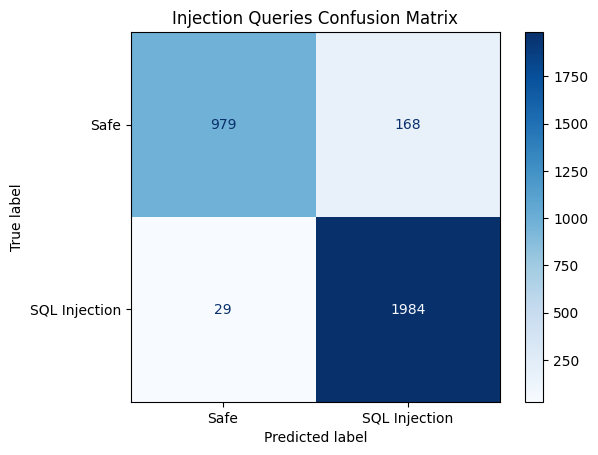

In [ ]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'SQL Injection'])
disp.plot(cmap = "Blues")
plt.title("Injection Queries Confusion Matrix")
plt.show()